In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b><font color='#8B0000'>TASK</font></b>

Read the provided dataset and save it in the variable `dataset_exam`.

In [3]:
# YOUR CODE HERE

import datetime as dt

In [4]:
# HELPER CELL - RUN IT!

print("Helper cell - done. Please continue!")

Helper cell - done. Please continue!


## Tasks

1. Find the mean compleation rates across males and females.
2. Investigate why the mean completion rates are so low.
3. Find the correlation coefficients between the numerical variables.
4. Find what variable is the most correlated with out target variable.
5. Find the connection between birth rate and enrollment rate.
5. Document your results.

# Read our data

In [5]:
df = pd.read_csv('./input/Global_Education.csv', encoding='latin-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              201 non-null    float64
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  201 non-null    float64
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

# Fix columns

In [7]:
df.columns

Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Edu

In [8]:
df.columns = df.columns.str.replace(" ", "_")

In [9]:
df.columns

Index(['Countries_and_areas', 'Latitude_', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Edu

# Drop unnecessary data

In [10]:
df.drop(["Latitude_", "Longitude"], axis=1, inplace=True)

# Derive basic statistics

In [11]:
statistics_df = df.describe()

In [12]:
statistics_df

,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,201.000000,202.000000,201.000000,202.000000,202.000000,202.000000,202.000000,202.000000,201.000000,...,201.000000,202.000000,202.000000,202.000000,201.00000,199.000000,202.000000,202.000000,202.000000,202.000000
mean,19.658416,19.134328,5.282178,5.592040,8.707921,8.831683,20.292079,19.975248,41.722772,42.338308,...,10.771144,10.376238,25.787129,24.450495,35.98010,35.613065,18.914010,94.942574,34.392574,6.000000
std,25.007604,25.145912,9.396442,10.403977,13.258203,14.724717,21.485592,23.140376,42.162708,43.104002,...,24.916608,22.484423,33.181384,31.965467,45.57828,45.383061,10.828184,29.769338,29.978206,5.273136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,37.500000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,31.000000,30.000000,6.000000,7.000000,12.750000,10.750000,32.750000,30.000000,87.500000,92.000000,...,0.000000,0.000000,56.750000,50.750000,94.00000,97.000000,27.692500,107.300000,59.975000,8.655000
max,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,100.000000,100.000000,...,99.000000,89.000000,89.000000,94.000000,100.00000,100.000000,46.080000,142.500000,136.600000,28.180000


# Find number of rows and columns

In [16]:
rows = df.shape[0]
cols = df.shape[1]

In [17]:
print(f"Number of rows: {rows}, number of columns: {cols}")

Number of rows: 202, number of columns: 27


# Find missing values

In [18]:
for col in df.columns:
    if df[col].isna().any():
        null_rate = df[col].isna().sum() / len(df[col])
        print(f'{col} null rate: {null_rate:.4f}')

OOSR_Pre0Primary_Age_Female null rate: 0.0050
OOSR_Primary_Age_Female null rate: 0.0050
Completion_Rate_Primary_Female null rate: 0.0050
Completion_Rate_Lower_Secondary_Male null rate: 0.0050
Completion_Rate_Upper_Secondary_Male null rate: 0.0050
Primary_End_Proficiency_Reading null rate: 0.0050
Youth_15_24_Literacy_Rate_Male null rate: 0.0050
Youth_15_24_Literacy_Rate_Female null rate: 0.0149


# Deal with missing values

In [29]:
for col in df.columns:
    if df[col].isna().any():
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(mode)

# Find duplicates

In [37]:
df.duplicated().any()

False

In [ ]:
drop_duplicates()

# New DataFrame

In [41]:
completion_columns = df.columns[df.columns.str.startswith("Completion")]

In [42]:
completion_columns

Index(['Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female'],
      dtype='object')

In [43]:
completion_rates_by_country = df.groupby(by='Countries_and_areas')[completion_columns].mean()

In [44]:
completion_rates_by_country

,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,Completion_Rate_Lower_Secondary_Male,Completion_Rate_Lower_Secondary_Female,Completion_Rate_Upper_Secondary_Male,Completion_Rate_Upper_Secondary_Female
Countries_and_areas,,,,,,
Afghanistan,67.0,40.0,49.0,26.0,32.0,14.0
Albania,94.0,96.0,98.0,97.0,76.0,80.0
Algeria,93.0,93.0,49.0,65.0,22.0,37.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0
Angola,63.0,57.0,42.0,32.0,24.0,15.0
...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,96.0,97.0,81.0,87.0,50.0,61.0
Yemen,70.0,55.0,55.0,39.0,37.0,23.0


In [45]:
completion_rates_by_country["Average_completion_rate"] = completion_rates_by_country.mean(axis=1)

In [46]:
completion_rates_by_country

,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,Completion_Rate_Lower_Secondary_Male,Completion_Rate_Lower_Secondary_Female,Completion_Rate_Upper_Secondary_Male,Completion_Rate_Upper_Secondary_Female,Average_completion_rate
Countries_and_areas,,,,,,,
Afghanistan,67.0,40.0,49.0,26.0,32.0,14.0,38.000000
Albania,94.0,96.0,98.0,97.0,76.0,80.0,90.166667
Algeria,93.0,93.0,49.0,65.0,22.0,37.0,59.833333
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Angola,63.0,57.0,42.0,32.0,24.0,15.0,38.833333
...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Vietnam,96.0,97.0,81.0,87.0,50.0,61.0,78.666667
Yemen,70.0,55.0,55.0,39.0,37.0,23.0,46.500000


# Top 10 countries

In [47]:
sorted_completion_rates = completion_rates_by_country.sort_values(by="Average_completion_rate", ascending=False)

In [53]:
top_10_countries = sorted_completion_rates.head(10)
bottom_10_countries = sorted_completion_rates.tail(10)

In [ ]:
#top_10_countries = completion_rates_by_country.nlargest(10, "Average_completion_rate")
#bottom_10_countries = completion_rates_by_country.nsmallest(10, "Average_completion_rate"))

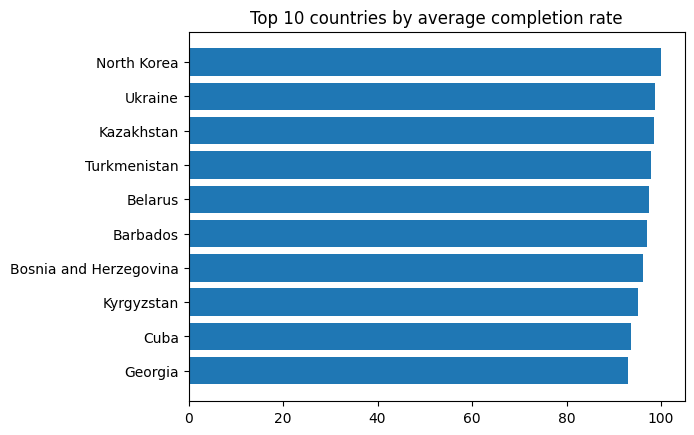

In [63]:
plt.barh(top_10_countries.index.values[::-1], top_10_countries["Average_completion_rate"][::-1])
plt.title("Top 10 countries by average completion rate")
plt.show()

In [64]:
male_columns_completion = df.columns[(df.columns.str.startswith("Completion")) & (df.columns.str.endswith("Male"))]
female_columns_completion = df.columns[(df.columns.str.startswith("Completion")) & (df.columns.str.endswith("Female"))]

In [65]:
male_columns_completion

Index(['Completion_Rate_Primary_Male', 'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Male'],
      dtype='object')

In [66]:
df[male_columns_completion].mean()

Completion_Rate_Primary_Male            41.722772
Completion_Rate_Lower_Secondary_Male    32.737624
Completion_Rate_Upper_Secondary_Male    22.683168
dtype: float64

In [68]:
df[female_columns_completion].mean()

Completion_Rate_Primary_Female            42.128713
Completion_Rate_Lower_Secondary_Female    33.168317
Completion_Rate_Upper_Secondary_Female    23.069307
dtype: float64

# Discover outliers

In [69]:
df['Completion_Rate_Primary_Male'].value_counts()

Completion_Rate_Primary_Male
0      95
99     12
95      7
100     7
96      6
98      5
91      4
75      4
67      3
64      3
52      2
93      2
77      2
92      2
81      2
71      2
80      2
69      2
66      2
94      2
84      2
78      2
97      2
63      2
31      2
68      2
44      2
79      1
48      1
50      1
89      1
83      1
35      1
82      1
39      1
70      1
51      1
43      1
36      1
49      1
29      1
32      1
47      1
88      1
60      1
54      1
76      1
46      1
86      1
Name: count, dtype: int64

In [70]:
df[female_columns_completion].mean()

Completion_Rate_Primary_Female            42.128713
Completion_Rate_Lower_Secondary_Female    33.168317
Completion_Rate_Upper_Secondary_Female    23.069307
dtype: float64

In [71]:
df['Completion_Rate_Primary_Female'].value_counts()

Completion_Rate_Primary_Female
0.0      95
100.0    11
99.0     10
98.0     10
97.0      6
96.0      5
92.0      4
73.0      3
95.0      3
82.0      2
55.0      2
86.0      2
60.0      2
84.0      2
76.0      2
39.0      2
58.0      2
77.0      2
33.0      2
24.0      2
71.0      2
89.0      2
94.0      2
83.0      2
91.0      1
61.0      1
50.0      1
65.0      1
18.0      1
41.0      1
64.0      1
90.0      1
52.0      1
85.0      1
40.0      1
87.0      1
25.0      1
75.0      1
48.0      1
66.0      1
53.0      1
74.0      1
79.0      1
54.0      1
29.0      1
44.0      1
57.0      1
93.0      1
43.0      1
Name: count, dtype: int64

We observed that average completion rate is oddly low. Therefore, we plot our variables to find out what is happening.

In [72]:
female_completion_rate_scores = df[female_columns_completion[0]].value_counts().index.values
female_completion_rate_count = df[female_columns_completion[0]].value_counts().values

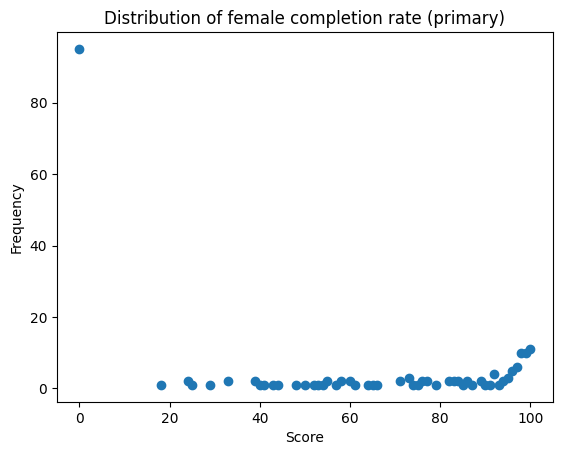

In [73]:
plt.scatter(female_completion_rate_scores, female_completion_rate_count)
plt.title("Distribution of female completion rate (primary)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#df.select_dtypes(include=numerics)

# Numerical columns

In [74]:
numerical_df = df.select_dtypes(include='number')

In [75]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 1   OOSR_Pre0Primary_Age_Female              202 non-null    float64
 2   OOSR_Primary_Age_Male                    202 non-null    int64  
 3   OOSR_Primary_Age_Female                  202 non-null    float64
 4   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 5   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 6   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 7   OOSR_Upper_Secondary_Age_Female          202 non-null    int64  
 8   Completion_Rate_Primary_Male             202 non-null    int64  
 9   Completion_Rate_Primary_Female           202 non-null    float64
 10  Completion_Rate_Lower_Secondary_Male     202 non-n

# Correlation between variables

In [76]:
corr_matrix = numerical_df.corr()
corr_matrix

,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
OOSR_Pre0Primary_Age_Male,1.000000,0.974398,0.541979,0.577915,0.534625,0.533876,0.475048,0.476920,0.123699,0.119958,...,-0.097947,-0.115318,-0.359043,-0.358424,0.002011,-0.012017,0.451898,-0.083844,-0.362917,0.130623
OOSR_Pre0Primary_Age_Female,0.974398,1.000000,0.543620,0.587730,0.537153,0.542058,0.455378,0.465296,0.139864,0.132958,...,-0.097896,-0.104709,-0.337954,-0.349621,0.016574,0.001402,0.470947,-0.055024,-0.347799,0.122639
OOSR_Primary_Age_Male,0.541979,0.543620,1.000000,0.964153,0.560956,0.572686,0.406544,0.419825,-0.002112,-0.019832,...,-0.050654,-0.073999,-0.258051,-0.265992,0.018375,0.005537,0.388390,-0.179302,-0.293258,0.074100
OOSR_Primary_Age_Female,0.577915,0.587730,0.964153,1.000000,0.660936,0.699115,0.483997,0.517434,-0.000868,-0.028050,...,-0.064881,-0.089652,-0.264456,-0.271557,0.034933,0.014815,0.414212,-0.182869,-0.298774,0.049511
OOSR_Lower_Secondary_Age_Male,0.534625,0.537153,0.560956,0.660936,1.000000,0.966085,0.807592,0.808483,0.103940,0.080384,...,-0.071948,-0.071277,-0.310789,-0.329829,0.034276,0.006352,0.438541,-0.036796,-0.331477,-0.030075
OOSR_Lower_Secondary_Age_Female,0.533876,0.542058,0.572686,0.699115,0.966085,1.000000,0.772854,0.812555,0.068481,0.034002,...,-0.073749,-0.083238,-0.302235,-0.318292,0.007934,-0.025590,0.465821,-0.035797,-0.328637,-0.042566
OOSR_Upper_Secondary_Age_Male,0.475048,0.455378,0.406544,0.483997,0.807592,0.772854,1.000000,0.965080,0.161697,0.147931,...,-0.083403,-0.054080,-0.359459,-0.377139,0.128415,0.108487,0.378810,-0.030308,-0.378626,-0.103774
OOSR_Upper_Secondary_Age_Female,0.476920,0.465296,0.419825,0.517434,0.808483,0.812555,0.965080,1.000000,0.136056,0.111010,...,-0.075684,-0.069173,-0.358775,-0.375763,0.100055,0.073178,0.443845,0.002852,-0.382639,-0.104612
Completion_Rate_Primary_Male,0.123699,0.139864,-0.002112,-0.000868,0.103940,0.068481,0.161697,0.136056,1.000000,0.993618,...,0.061909,0.140279,-0.193224,-0.253032,0.256216,0.252927,0.295921,0.170565,-0.178579,0.277663
Completion_Rate_Primary_Female,0.119958,0.132958,-0.019832,-0.028050,0.080384,0.034002,0.147931,0.111010,0.993618,1.000000,...,0.065865,0.140531,-0.186450,-0.246440,0.262168,0.264148,0.272437,0.177076,-0.173107,0.281272


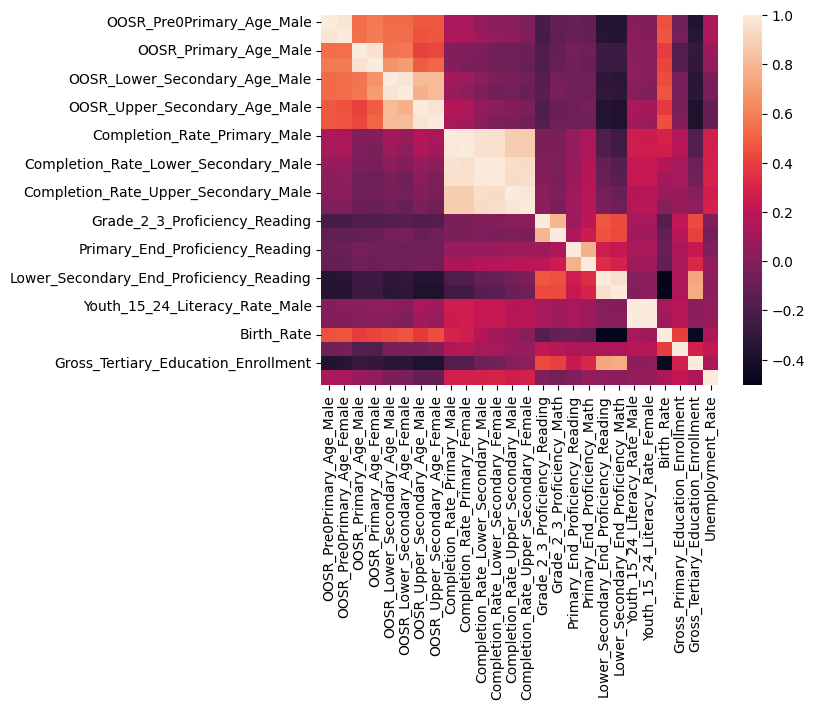

In [77]:
# try annot=True
sns.heatmap(corr_matrix)
plt.show()

# Unemployment drivers

In [78]:
corr_matrix['Unemployment_Rate'].sort_values(ascending=False)

Unemployment_Rate                          1.000000
Completion_Rate_Lower_Secondary_Female     0.297181
Completion_Rate_Lower_Secondary_Male       0.285564
Completion_Rate_Upper_Secondary_Female     0.285201
Completion_Rate_Primary_Female             0.281272
Completion_Rate_Primary_Male               0.277663
Completion_Rate_Upper_Secondary_Male       0.267683
Gross_Primary_Education_Enrollment         0.215464
Birth_Rate                                 0.143130
Gross_Tertiary_Education_Enrollment        0.140702
OOSR_Pre0Primary_Age_Male                  0.130623
OOSR_Pre0Primary_Age_Female                0.122639
OOSR_Primary_Age_Male                      0.074100
Primary_End_Proficiency_Math               0.061507
Youth_15_24_Literacy_Rate_Female           0.055326
Youth_15_24_Literacy_Rate_Male             0.052013
OOSR_Primary_Age_Female                    0.049511
Lower_Secondary_End_Proficiency_Reading    0.032903
Lower_Secondary_End_Proficiency_Math       0.029691
Primary_End_

In [79]:
absolute_unemployment_drivers = corr_matrix['Unemployment_Rate'].abs().sort_values(ascending=False)
absolute_unemployment_drivers

Unemployment_Rate                          1.000000
Completion_Rate_Lower_Secondary_Female     0.297181
Completion_Rate_Lower_Secondary_Male       0.285564
Completion_Rate_Upper_Secondary_Female     0.285201
Completion_Rate_Primary_Female             0.281272
Completion_Rate_Primary_Male               0.277663
Completion_Rate_Upper_Secondary_Male       0.267683
Gross_Primary_Education_Enrollment         0.215464
Birth_Rate                                 0.143130
Gross_Tertiary_Education_Enrollment        0.140702
OOSR_Pre0Primary_Age_Male                  0.130623
OOSR_Pre0Primary_Age_Female                0.122639
OOSR_Upper_Secondary_Age_Female            0.104612
OOSR_Upper_Secondary_Age_Male              0.103774
OOSR_Primary_Age_Male                      0.074100
Primary_End_Proficiency_Math               0.061507
Grade_2_3_Proficiency_Math                 0.057321
Youth_15_24_Literacy_Rate_Female           0.055326
Youth_15_24_Literacy_Rate_Male             0.052013
OOSR_Primary

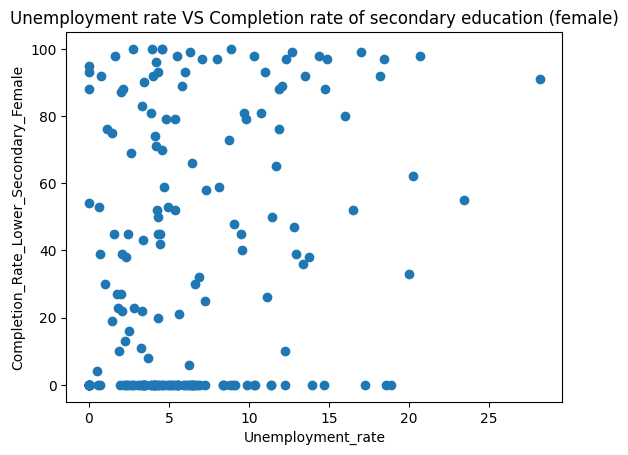

In [80]:
plt.scatter(df["Unemployment_Rate"], df["Completion_Rate_Lower_Secondary_Female"])
plt.title("Unemployment rate VS Completion rate of secondary education (female)")
plt.xlabel("Unemployment_rate")
plt.ylabel("Completion_Rate_Lower_Secondary_Female")
plt.show()

In [ ]:
#absolute_unemployment_drivers.drop("Unemployment_Rate", inplace=True)

In [81]:
top_5_drivers = absolute_unemployment_drivers.head(6).index.values
top_5_drivers

array(['Unemployment_Rate', 'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Completion_Rate_Primary_Female', 'Completion_Rate_Primary_Male'],
      dtype=object)

In [82]:
top_5_corr_matrix = df[top_5_drivers].corr()

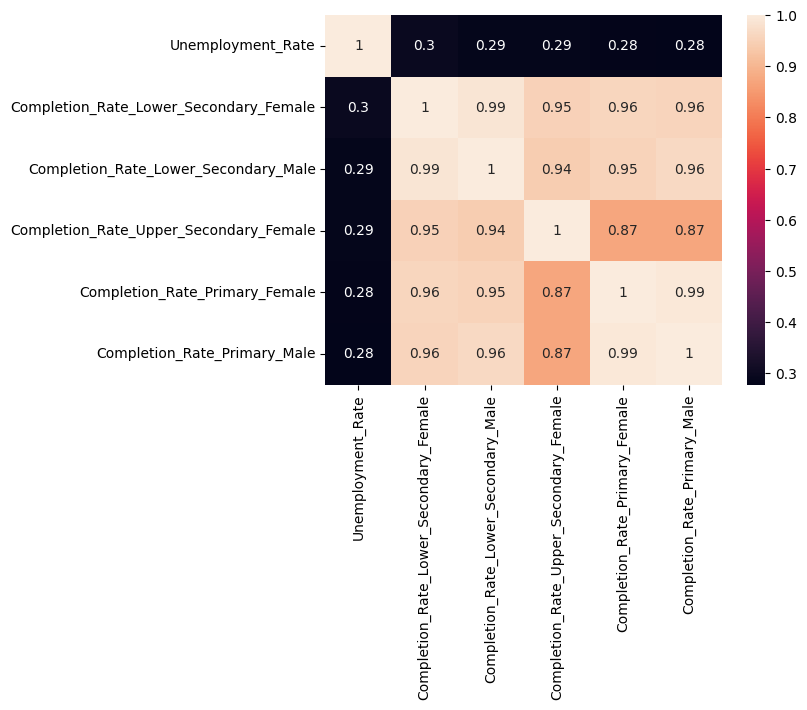

In [83]:
sns.heatmap(top_5_corr_matrix, annot=True)
plt.show()

# Unemployment by country

In [84]:
mean_unemployment_by_country = df.groupby(by='Countries_and_areas')['Unemployment_Rate'].mean()

In [85]:
top_15_countries = mean_unemployment_by_country.nlargest(n=15)
top_15_countries

Countries_and_areas
South Africa                        28.18
Lesotho                             23.41
Saint Lucia                         20.71
Namibia                             20.27
Gabon                               20.00
Saint Vincent and the Grenadines    18.88
Libya                               18.56
Bosnia and Herzegovina              18.42
Botswana                            18.19
Greece                              17.24
Armenia                             16.99
Sudan                               16.53
Tunisia                             16.02
Montenegro                          14.88
Jordan                              14.72
Name: Unemployment_Rate, dtype: float64

In [86]:
color_map = ['#9ad6aa' for col in range(15)]
color_map[0] = color_map[1] = color_map[2] = '#32a852'

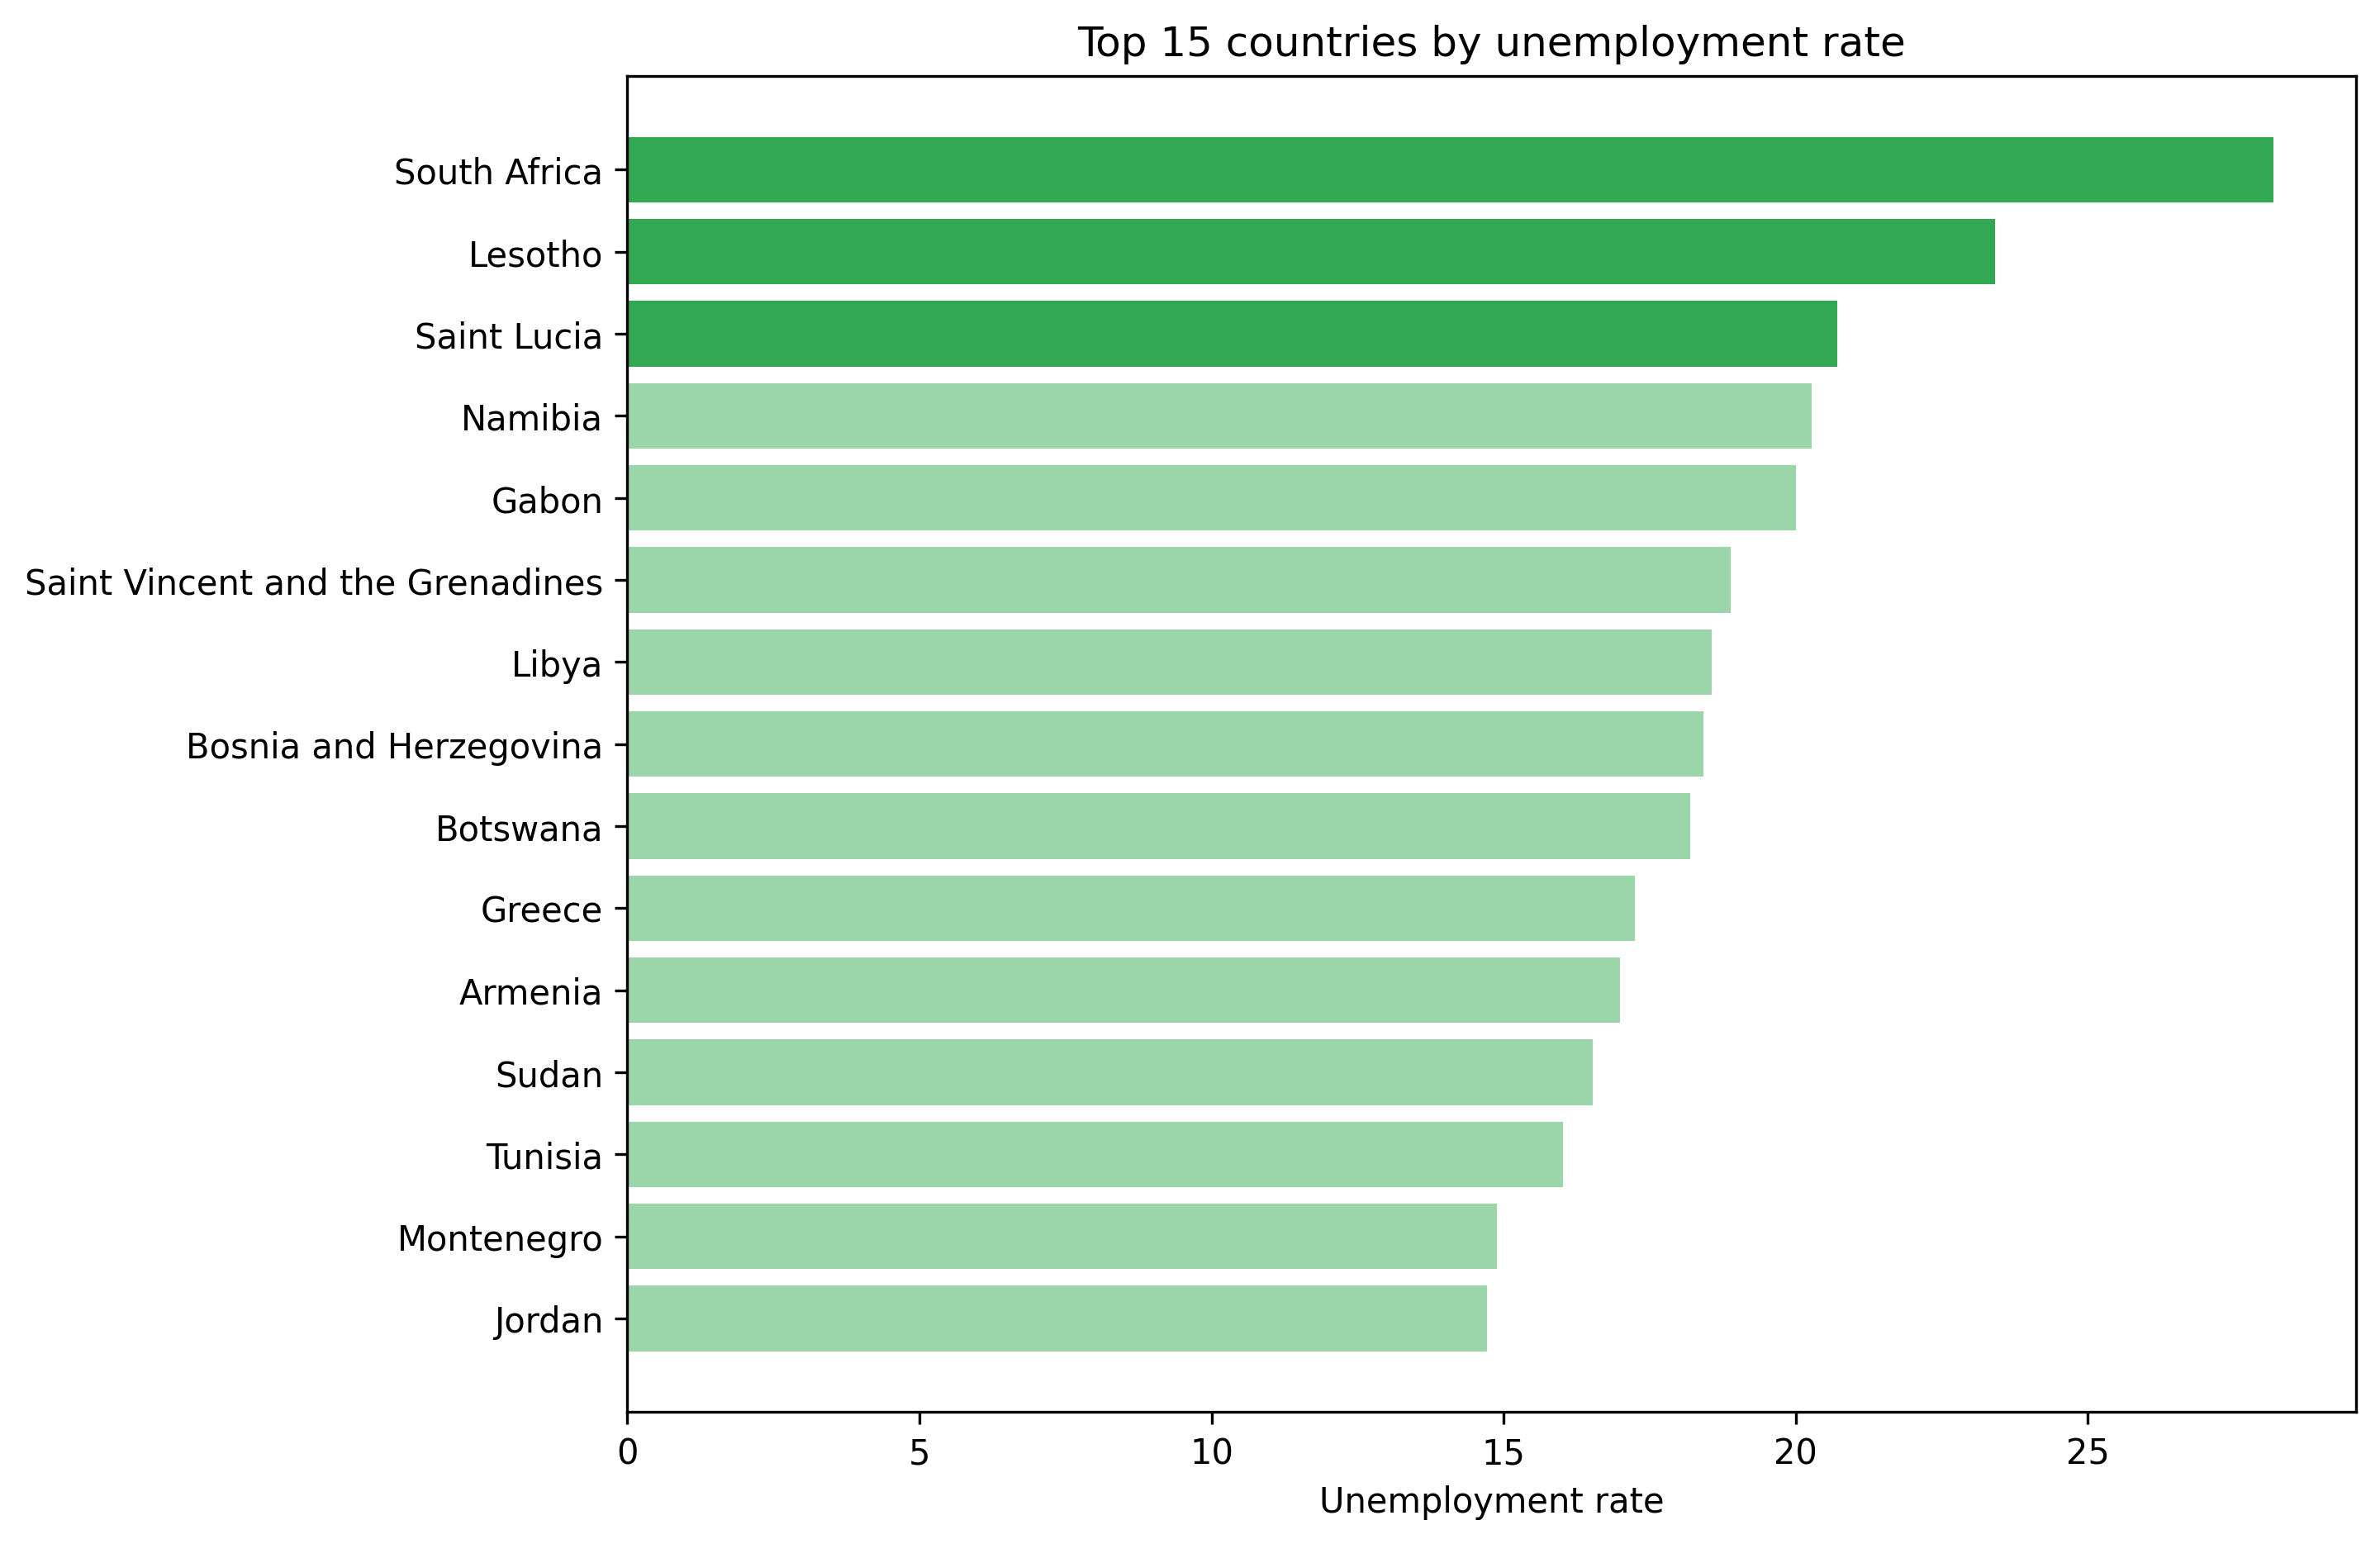

In [87]:
plt.figure(figsize=(9, 7), dpi=300)
plt.barh(top_15_countries.index.values[::-1], top_15_countries.values[::-1], color=color_map[::-1])
plt.title("Top 15 countries by unemployment rate")
plt.xlabel("Unemployment rate")
plt.show()

# Birth rate and enrollment

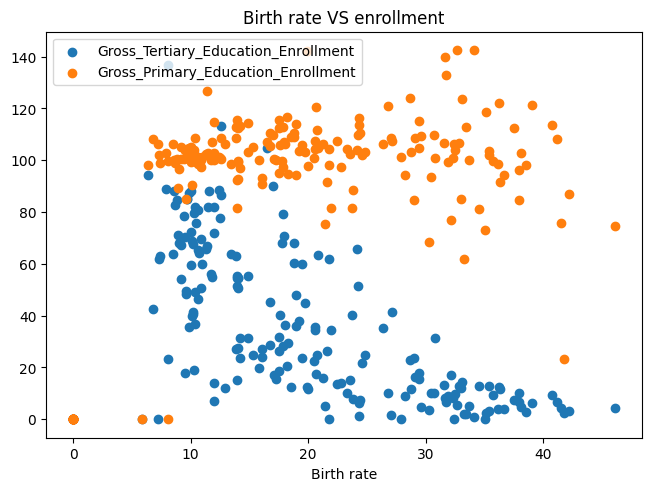

In [88]:
plt.figure(layout='constrained')
plt.scatter(df.Birth_Rate, df.Gross_Tertiary_Education_Enrollment, label='Gross_Tertiary_Education_Enrollment')
plt.scatter(df.Birth_Rate, df.Gross_Primary_Education_Enrollment, label='Gross_Primary_Education_Enrollment')
plt.title("Birth rate VS enrollment")
plt.xlabel("Birth rate")
plt.legend(loc='upper left')
plt.show()

# Documentation